# Bracketed minimization

Like in root finding, you will often have *some idea* of where the optimium is. In similar fashion, we can iteratively improve our brackets until they are *close enough*

## Golden section search

In the bisection root finding algorithm, two points were sufficient since they identify a sign change. For minimization, we need to determine a minimum, so need 3 points.

> Given 3 points ($x_1, x_2, x_3$)
>
> Choose a point $x_4$
>
> Evaluate the quadratic at $x_4$
>
> If $f(x_4) \lt f(x_2)$, select <$x_2, x_4, x_3$>.
>
> If $f(x_4) \gt f(x_2)$, select <$x_1, x_2, x_4$>
>
> Repeat until a tolerance is met

How do we choose $x_4$?


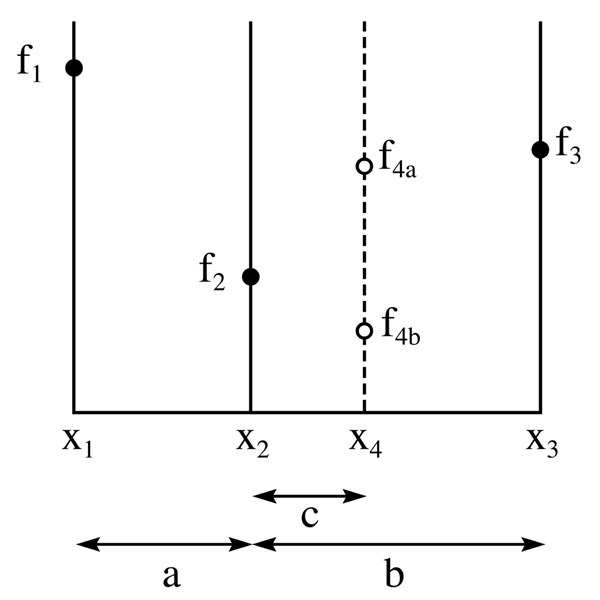

### The Golden ratio

To make a robust method, we want both of these paths to result in the same reduction of the search interval, and ideally reuse the function evaluations. This *self-similarity* implies we want to maintain the ratio of subdivision:

In the tripplet <$x_1, x_2, x_4$> with $f_{4a}$, we want, $\frac{c}{a}=\frac{a}{b}$.

In the tripplet <$x_2, x_4, x_3$> with $f_{4b}$, we want  $\frac{c}{b-c}=\frac{a}{b}$

Using these two equations, we can elimiante $c$ and find,
$${\frac{b}{a}}^2 - \frac{b}{a} = 1$$

and ignoring the negative root, $$\frac{b}{a} = \varphi = \frac{1+\sqrt{5}}{2} =1.618033988...$$

the *Golden ratio*!





#### Aside: The divine proportion

The Golden ratio appears **all over the place!**

In [ ]:
import numpy as np

def fibonacci(n):
  """
  Computes the Fibonacci sequence up to n terms.
  """
  fib_sequence = [0, 1]
  while len(fib_sequence) < n:
    next_fib = fib_sequence[-1] + fib_sequence[-2]
    fib_sequence.append(next_fib)
  return fib_sequence

n = 15  # Number of terms in the Fibonacci sequence
fib_sequence = fibonacci(n)
print("Fibonacci sequence:", fib_sequence)

golden_ratios = []
for i in range(2, n):
  golden_ratios.append(fib_sequence[i] / fib_sequence[i-1])

print("Golden ratios:", golden_ratios)

Fibonacci sequence: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
Golden ratios: [1.0, 2.0, 1.5, 1.6666666666666667, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182, 1.6179775280898876, 1.6180555555555556, 1.6180257510729614]


The Greeks knew it!

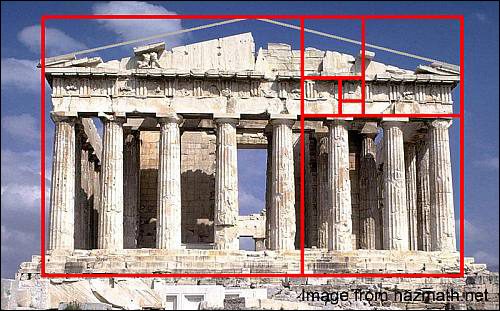

Nature knows it (kinda)

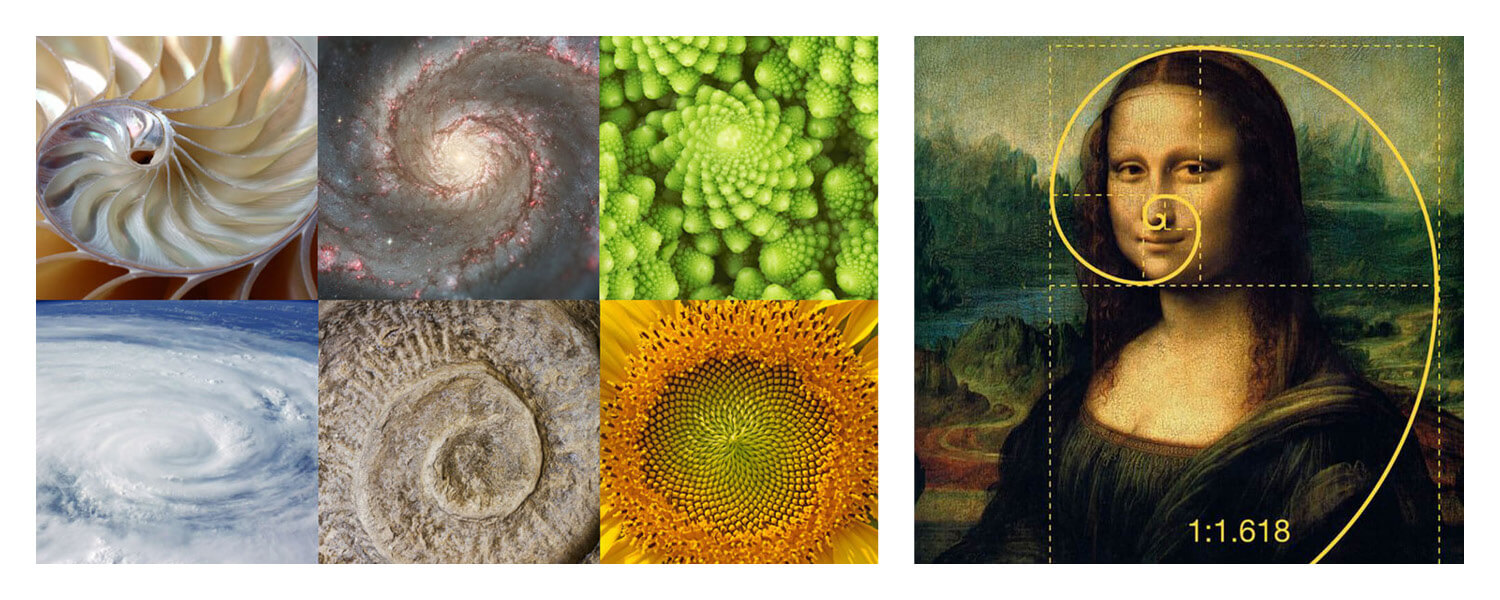

## Convergence rate

Each iteration of the Golden section method reduces the bracketed interval by $\varphi^{-1} = 0.618$, which becomes its order of convergence.

The Golden section method is gauranteed to converge but does so slowly at a sub-linear rate.



---


# Brent's method

We've seen this concept before in root finding with bisection. Later we saw the value of using the function values to approximate the derivative and guess at the root. Since we had two points, we fit a line (which approximated the derivative) which is the Secant method.


Now we have 3 points so we can fit a parabola and find $f_{min} = f(x_{min})$!




### Inverse quadratic interpolation

BUT there is one problem, we want to estimate $x_{min}$ not $f_{min}$, so what we actually need to approximate is the *inverse quadratic*.

$$
x_4 = \frac{f_2 f_3}{[f_1-f_2][f_1-f_3]} x_1 + \frac{f_1 f_3}{[f_2-f_1][f_2-f_3]} x_2 + \frac{f_3 f_2}{[f_3-f_1][f_3-f_2]} x_3
$$

The convergence order of inverse quadratic approxiation is $\sim 1.84$.



### Combination with Golden section

Brent's method combines the robutness of the Golden Section method with the accelaration of inverse quadratic approximation (still without any derivative information!).

Candidate steps from inverse quadratic interpolation, Golden section, and sometimes Secant, are generated and compared against various criteria for robustness and progression.

This complicated decision tree makes the order of convergence difficult to assess, but for well behaved functions it typically has $\gt 1.3$.

#### Example: Unimodal minimization

Minimize $x^4+10x$

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

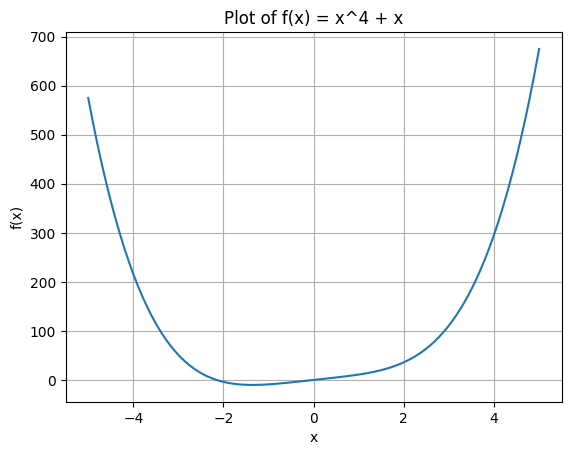

-5
0
5
-1.9098300000000001
-3.09016987422
-1.0343458767574745
-1.181577493941968
-1.304005930779925
-1.5354101272036402
-1.3493130244641753
-1.360162925456641
-1.3572686570310966
-1.357202998346505
-1.3572088473834198
-1.3572088082219729
-1.3572087881252826
Minimum found at x = -10.1790660622309
-1.3572088082219729
Minimum function value = -10.1790660622309


In [ ]:
# prompt: Plot and minimize x^4+x on the interval -5 5 using brents method

def f(x):
  print(x)
  return x**4 + 10*x

x = np.linspace(-5, 5, 100)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^4 + x')
plt.grid(True)
plt.show()


result = optimize.minimize_scalar(f, bracket=(-5, 0, 5), method = "Brent")
print("Minimum found at x =", result.fun)
print("Minimum function value =", f(result.x))


#### Example: Non differentiable function

Let's try a non-differential function: $f(x) = \|x\|$:

In [ ]:
# prompt: Use minimize_scalar on a nondifferentiable function

def nondiff_func(x):
  print(x)
  return abs(x)

#~~ What should we use for the bracket? What happens if we use a different method?
bracket = (-5, 5)

##

result = optimize.minimize_scalar(nondiff_func, bracket=bracket, method="Brent")
print("Minimum found at x =", result.x)
print("Minimum function value =", nondiff_func(result.x))


-5
5
21.18034
11.180339748440002
1.1803399999999997
-1.1803397484400002
-2.0351634599791169e-07
6.288998898266019e-08
0.4508497873081514
0.07788236151205088
0.01345381387145999
0.002324054369767623
0.0004014354205322895
6.931111691218845e-05
1.193804613339047e-05
2.0270904619436587e-06
3.150147269686505e-07
1.926087441788894e-08
-3.182935454321158e-08
3.0662337662403348e-09
-2.8394285480784205e-09
-3.279242240095256e-10
5.0637275275494315e-11
1.2024926045433706e-09
1.8487990512897325e-10
-3.023893922134733e-11
-2.0238938773811033e-11
3.0613588511369835e-12
2.1233741344083055e-11
-6.938641194171126e-12
Minimum found at x = 3.0613588511369835e-12
3.0613588511369835e-12
Minimum function value = 3.0613588511369835e-12


#### Example: A more treacherous function

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

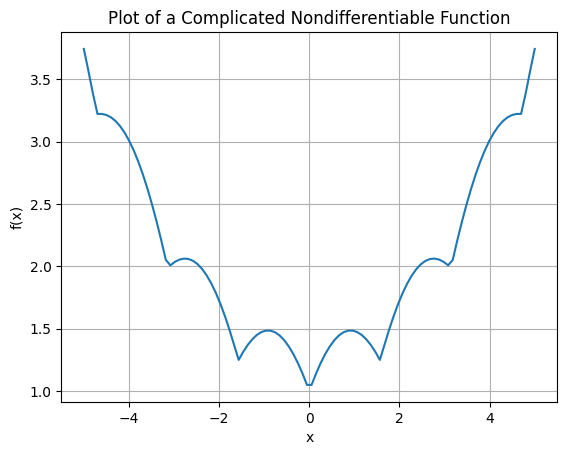

-5
5
21.18034
11.180339748440002
1.1803399999999997
0.09458844428123059
-1.851371125427094
-0.2178561188045674
0.2955773973951216
0.013367139936113784
-0.03125309331092177
0.00941889115377949
-0.0031614237350019517
-0.005118141940542849
0.0007171089314151327
0.004040893879762758
0.0001702967013971977
-0.0005786354954037355
2.4438122178259777e-05
-9.778851886602696e-05
1.3597865341453028e-05
-1.5788125925539715e-05
2.3734158011648776e-06
-4.6525327979423743e-07
-6.3180696527990555e-06
-7.928505706579973e-07
3.176832330622026e-07
1.102903179170109e-06
5.5181149917313e-08
-3.251689813735922e-08
-4.969018548934073e-08
5.638184896694283e-10
2.1425782105760735e-08
-2.724701120183268e-09
3.707823274770505e-09
1.9492149616025546e-10
-5.01574131468465e-10
-7.111615274257643e-11
-4.8692901721861595e-11
2.3219656378561172e-11
1.313591135533361e-11
-4.650324178731215e-12
-1.465032424755601e-11
Minimum found at x = -4.650324178731215e-12
-4.650324178731215e-12
Minimum function value = 1.00000000000

In [ ]:
# prompt: Plot and Do minimization on a more complicated nondifferentiable function

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize


def complicated_nondiff_func(x):
  print(x)
  return np.abs(np.sin(x)) + np.abs(np.cos(x))+.1*x**2


x = np.linspace(-5, 5, 100)
y = complicated_nondiff_func(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of a Complicated Nondifferentiable Function')
plt.grid(True)
plt.show()

result = optimize.minimize_scalar(complicated_nondiff_func, bracket=(-5, 5), method="Brent")
print("Minimum found at x =", result.x)
print("Minimum function value =", complicated_nondiff_func(result.x))
